In [98]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
df = pd.read_csv("OECD,DF_BLI,+all.csv")

# Tomamos las columnas que nos importan
df = df.drop(columns = [columns for columns in df.columns if columns not in ["LOCATION", "INDICATOR", "OBS_VALUE", "UNIT_MEASURE", "INEQUALITY"]])
df = df[df["INEQUALITY"] == "TOT"]
df

,LOCATION,INDICATOR,INEQUALITY,OBS_VALUE,UNIT_MEASURE
0,AUT,JE_LMIS,TOT,2.3,PC
1,BEL,JE_LMIS,TOT,2.4,PC
2,CAN,JE_LMIS,TOT,3.8,PC
3,CZE,JE_LMIS,TOT,2.3,PC
4,DNK,JE_LMIS,TOT,4.5,PC
...,...,...,...,...,...
2360,CRI,HO_NUMR,TOT,1.2,RATIO
2361,CRI,IW_HADI,TOT,16517.0,USD
2362,CRI,EQ_AIRP,TOT,17.5,MICRO_M3
2363,CRI,HS_LEB,TOT,80.5,YR


 Primero modificamos el dataframe para que haya una columna para cada indicador y observamos la correlacion entre las variables

INDICATOR  CG_SENG  CG_VOTO  EQ_AIRP  EQ_WATER  ES_EDUA  ES_EDUEX  ES_STCS  \
LOCATION                                                                     
AUS            2.7     92.0      6.7      92.0     84.0      20.0    499.0   
AUT            1.3     76.0     12.2      92.0     86.0      17.0    491.0   
BEL            2.0     88.0     12.8      79.0     80.0      19.0    500.0   
BRA            2.2     80.0     11.7      70.0     57.0      16.0    400.0   
CAN            2.9     68.0      7.1      90.0     92.0      17.0    517.0   

INDICATOR  HO_BASE  HO_HISH  HO_NUMR  ...  JE_EMPL  JE_LMIS  JE_LTUR  \
LOCATION                              ...                              
AUS            NaN     19.4      NaN  ...     73.0      3.1      1.0   
AUT            0.8     20.8      1.6  ...     72.0      2.3      1.3   
BEL            0.7     20.0      2.1  ...     65.0      2.4      2.3   
BRA            6.7      NaN      NaN  ...     57.0      NaN      NaN   
CAN            0.2   

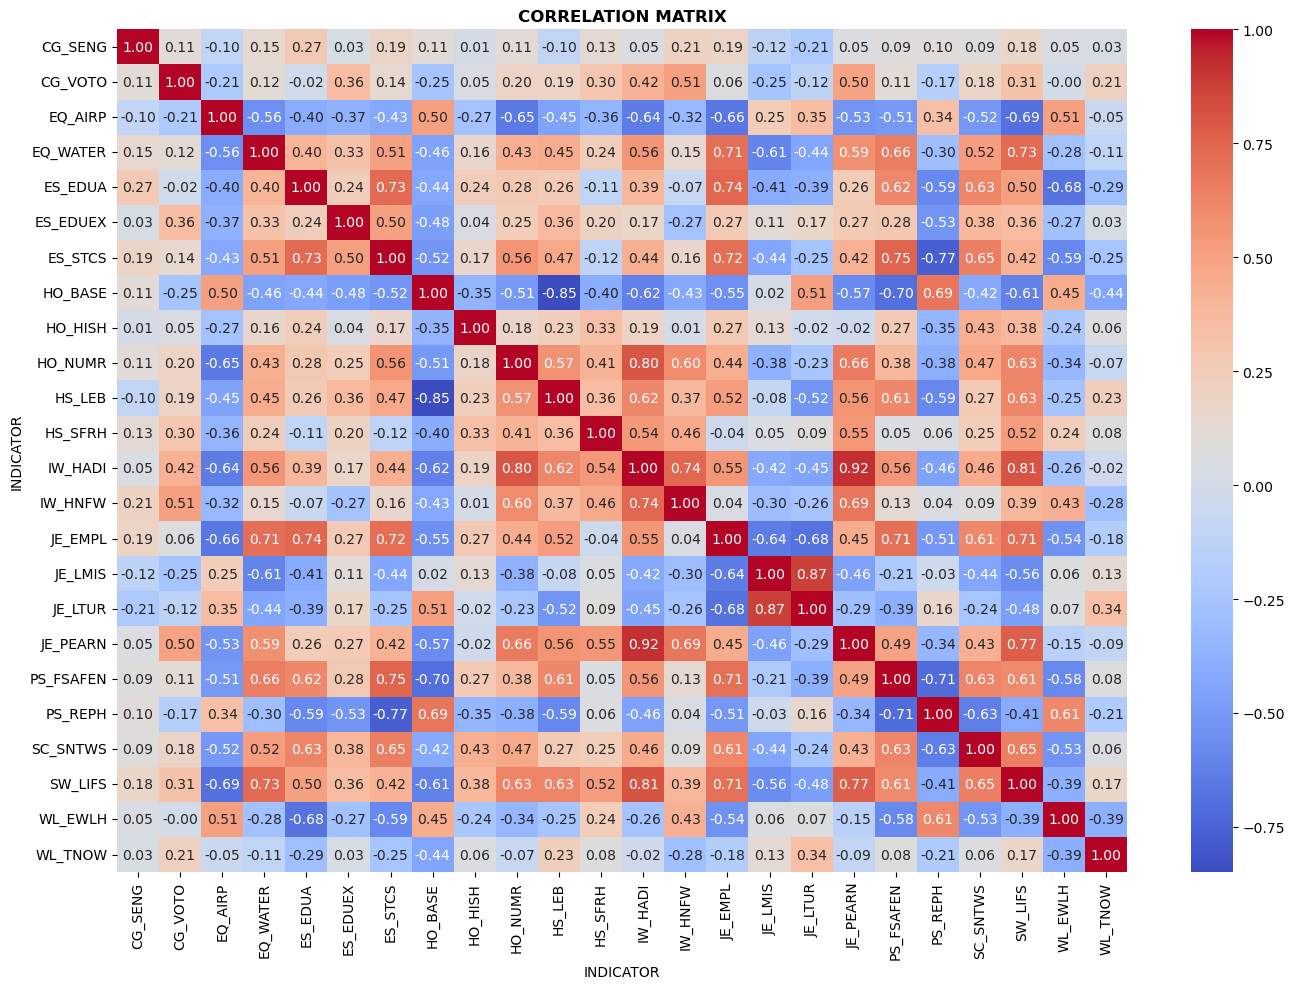

In [100]:
def getCorr(dataSet):
    """
    Mostrar estadísticas y matriz de correlación para indicadores.
    """

    print(dataSet.head())
    print("\nDescripción estadística:\n")
    print(dataSet.describe())
    print("")

    # Matriz de correlación
    plt.figure(figsize=(14, 10))
    sns.heatmap(dataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.tight_layout()
    plt.show()


df_corr = df.pivot(index='LOCATION', columns='INDICATOR', values='OBS_VALUE')
getCorr(df_corr)

Vamos a tomar las relaciones de nuestro interés, en este caso serán
- PS_REPH (Homicide Rate)
- ES_STCS (Student Skills)
Que tienen una correlacion inversa con coeficiente de -0.77

Indicando que a mayor Students Skills que se presenten en un país, menor será su Homicide Rate

In [101]:
# Primero creamos el dataframe de homicide rate (HS_LEB) y lo limpiamos
homicide_rate = df[df["INDICATOR"] == "PS_REPH"]
homicide_rate = homicide_rate.sort_values(by='LOCATION', ascending=True) # Las ordenamos de A-Z antes de reiniciar el index
homicide_rate.reset_index(drop=True, inplace=True)
print(homicide_rate["UNIT_MEASURE"].unique())  # Es de tipo RATIO 

# Ahora el dataframe de student skills (ES_STCS) y tambien lo limpiamos
students_skills = df[df["INDICATOR"] == "ES_STCS"]
students_skills = students_skills.sort_values(by='LOCATION', ascending=True) # Las ordenamos de A-Z antes de reiniciar el index
students_skills.reset_index(drop=True, inplace=True)
print(students_skills["UNIT_MEASURE"].unique())  # Es de tipo AVSCORE


# Ahora eliminamos paises que no tengan en comun ambos dataframes,
# para evitar problemas
common_countries = homicide_rate["LOCATION"].isin(students_skills["LOCATION"])
homicide_rate = homicide_rate[common_countries].reset_index(drop=True)

common_countries = students_skills["LOCATION"].isin(homicide_rate["LOCATION"])
students_skills = students_skills[common_countries].reset_index(drop=True)


homicide_rate

['RATIO']
['AVSCORE']


,LOCATION,INDICATOR,INEQUALITY,OBS_VALUE,UNIT_MEASURE
0,AUS,PS_REPH,TOT,0.9,RATIO
1,AUT,PS_REPH,TOT,0.5,RATIO
2,BEL,PS_REPH,TOT,1.1,RATIO
3,BRA,PS_REPH,TOT,19.0,RATIO
4,CAN,PS_REPH,TOT,1.2,RATIO
5,CHE,PS_REPH,TOT,0.3,RATIO
6,CHL,PS_REPH,TOT,2.4,RATIO
7,COL,PS_REPH,TOT,23.1,RATIO
8,CRI,PS_REPH,TOT,10.0,RATIO
9,CZE,PS_REPH,TOT,0.7,RATIO


In [102]:
students_skills

,LOCATION,INDICATOR,INEQUALITY,OBS_VALUE,UNIT_MEASURE
0,AUS,ES_STCS,TOT,499.0,AVSCORE
1,AUT,ES_STCS,TOT,491.0,AVSCORE
2,BEL,ES_STCS,TOT,500.0,AVSCORE
3,BRA,ES_STCS,TOT,400.0,AVSCORE
4,CAN,ES_STCS,TOT,517.0,AVSCORE
5,CHE,ES_STCS,TOT,498.0,AVSCORE
6,CHL,ES_STCS,TOT,438.0,AVSCORE
7,COL,ES_STCS,TOT,406.0,AVSCORE
8,CRI,ES_STCS,TOT,415.0,AVSCORE
9,CZE,ES_STCS,TOT,495.0,AVSCORE


In [103]:
# Vamos a normalizar los datos

# Primero de life expectancy
min_HR = homicide_rate['OBS_VALUE'].min()
max_HR = homicide_rate['OBS_VALUE'].max()
print(min_HR, max_HR)

homicide_rate_n = (homicide_rate['OBS_VALUE'] - min_HR) / (max_HR - min_HR)

# Ahora para homicide rate
min_SS = students_skills['OBS_VALUE'].min()
max_SS = students_skills['OBS_VALUE'].max()
print(min_SS, max_HR)

students_skills_n = (students_skills['OBS_VALUE'] - min_SS) / (max_SS - min_SS)

print(f"homicide rate normalized: max -> {homicide_rate_n.max()}, min -> {homicide_rate_n.min()}, avg -> {homicide_rate_n.mean()}")
print(f"students skills normalized: max -> {students_skills_n.max()}, min -> {students_skills_n.min()}, avg -> {students_skills_n.mean()}")


0.2 26.8
400.0 26.8
homicide rate normalized: max -> 1.0, min -> 0.0, avg -> 0.10817669172932329
students skills normalized: max -> 1.0, min -> 0.0, avg -> 0.6682539682539682


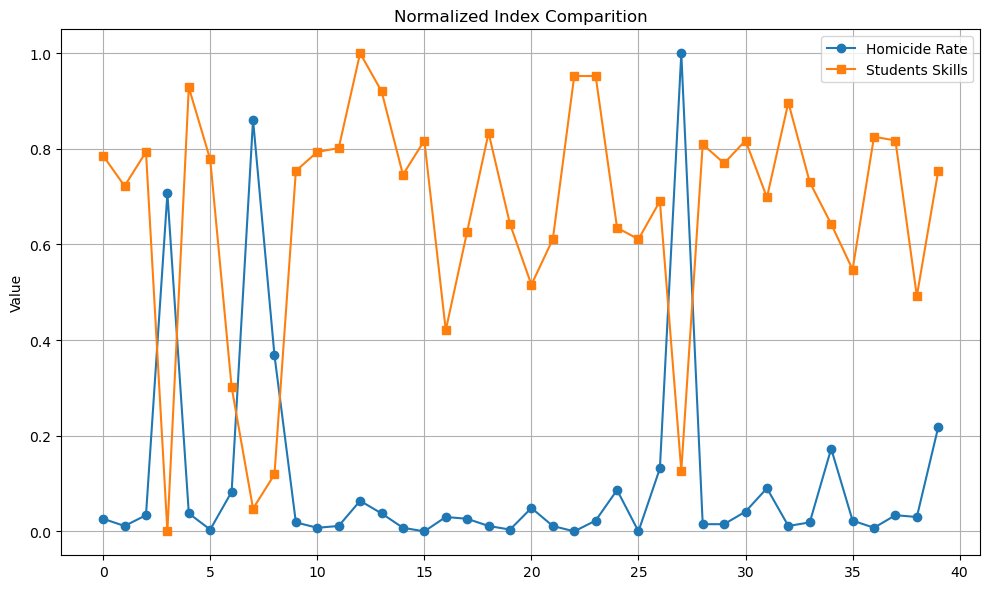

In [104]:
# Graficar los datasets

plt.figure(figsize=(10, 6))
plt.plot(homicide_rate_n.index, homicide_rate_n.values, label='Homicide Rate', marker='o')
plt.plot(students_skills_n.index, students_skills_n.values, label='Students Skills', marker='s')

plt.title('Normalized Index Comparition')
plt.xlabel('')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


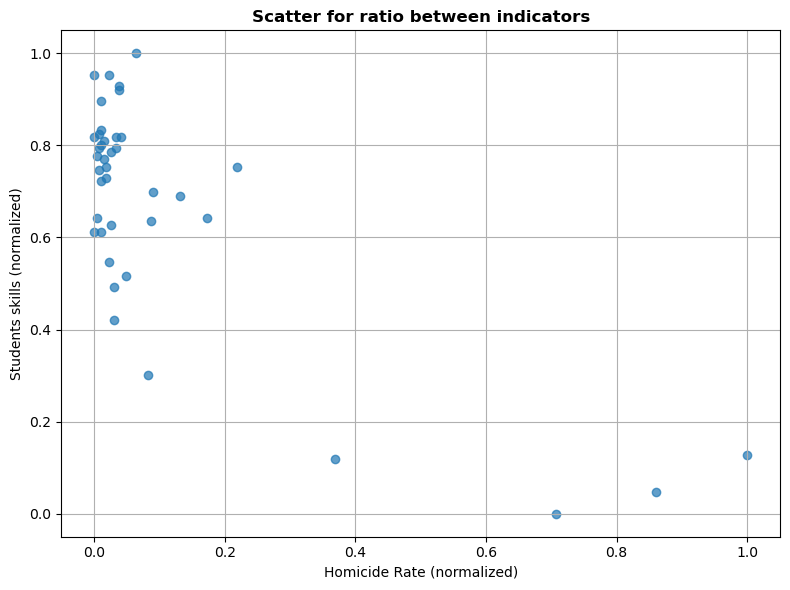

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(homicide_rate_n, students_skills_n, alpha=0.7)
plt.title("Scatter for ratio between indicators", fontweight='bold')
plt.xlabel("Homicide Rate (normalized)")
plt.ylabel("Students skills (normalized)")
plt.grid(True)
plt.tight_layout()
plt.show()